In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./Train_Data.csv")

In [3]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
data.tail()

age            job   marital  education default  balance housing loan  \
36163   30  self-employed    single   tertiary      no      137     yes   no   
36164   54     technician  divorced  secondary      no     1252     yes   no   
36165   40     management   married   tertiary      no      -17     yes  yes   
36166   45    blue-collar   married    unknown      no      -72     yes   no   
36167   41  self-employed    single   tertiary      no      428     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
36163  cellular   11   may       214         1     -1         0  unknown   no  
36164  cellular   11   may       101         1    350         1  failure   no  
36165  cellular   11   may       474         1    256         1  success  yes  
36166  cellular   11   may       306         1     -1         0  unknown   no  
36167  cellular   11   may       106         1     -1         0  unknown   no

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


Age ,balance,day,duration campaign,pdays and previous as Integer
and Job,Marital,education,ddefault,housing,loan,contact,month,poutcome as Categorical features

In [6]:
data.shape # Data set have 17 input features and 36168 samples

(36168, 17)

In [7]:
#checking of missing values

data.isna().any()  #or   df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

Note:-we have no null values in our dataset


In [8]:
data.isna().apply(pd.value_counts).T

False
age        36168
job        36168
marital    36168
education  36168
default    36168
balance    36168
housing    36168
loan       36168
contact    36168
day        36168
month      36168
duration   36168
campaign   36168
pdays      36168
previous   36168
poutcome   36168
y          36168

In [9]:
data.describe().T

count         mean          std     min    25%    50%     75%  \
age       36168.0    40.840743     9.651947    19.0   33.0   39.0    48.0   
balance   36168.0  1287.631166  2905.161234 -8019.0   52.0  409.0  1330.0   
day       36168.0    16.173330     8.525741     1.0    8.0   17.0    22.0   
duration  36168.0   255.643995   260.655720     0.0  100.0  175.0   313.0   
campaign  36168.0     2.931459     3.345965     1.0    1.0    2.0     3.0   
pdays     36168.0    22.493890    74.662548    -1.0   -1.0   -1.0    -1.0   
previous  36168.0     0.318652     2.013822     0.0    0.0    0.0     0.0   

              max  
age          95.0  
balance   98417.0  
day          31.0  
duration   4918.0  
campaign     63.0  
pdays       371.0  
previous    275.0

We age ,balance,day,duration campaign,pdays and previous as Integer
and 

In [10]:
#Distribution of the Target Feature: 'y' - has the client subscribed a term deposit? (binary: 'yes', 'no')

data['y'].value_counts(normalize='True') #normalise='True' returns % according to frequency

no     0.932731
yes    0.067269
Name: y, dtype: float64

In [11]:
# No: 93% - UnSubscribed to term deposit
# YES : 6%  - subscribed to term deposit

#Imbalanced dataset.

C:\Users\Satish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

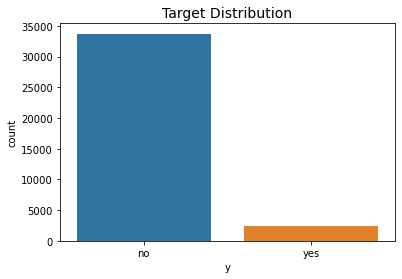

In [12]:
sns.countplot(data['y'])
plt.title("Target Distribution", fontsize=14)

In [13]:
#removal of duplicate rows
print(data.shape)
data2 = data.copy()
data2.shape

(36168, 17)


(36168, 17)

In [14]:
data = data.drop_duplicates()
print(data.shape)

(36168, 17)


In [15]:
#Checking Unique values in each variable
data.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6656
housing         2
loan            2
contact         3
day            31
month          11
duration     1511
campaign       48
pdays         339
previous       34
poutcome        4
y               2
dtype: int64

In [16]:
#The features 'age', 'duration', 'campaign', 'pdays','balance' contain a lot of unique values.

In [17]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
#Segregating Categorical & Numerical Variables
#categorical :-Job,Marital,education,default,housing,loan,contact,month,poutcome 
cat_cols = ['job','marital','education','default','housing','loan','contact','month', 'poutcome']

num_cols = [c for c in data.columns if c not in cat_cols]
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

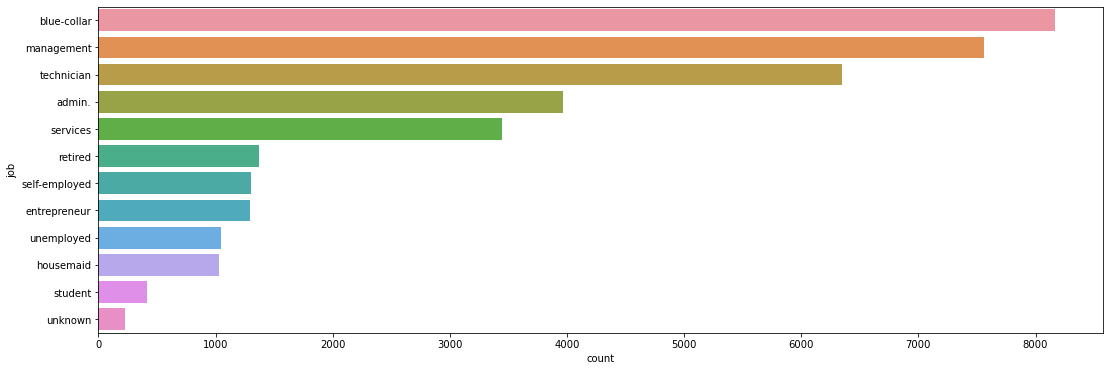

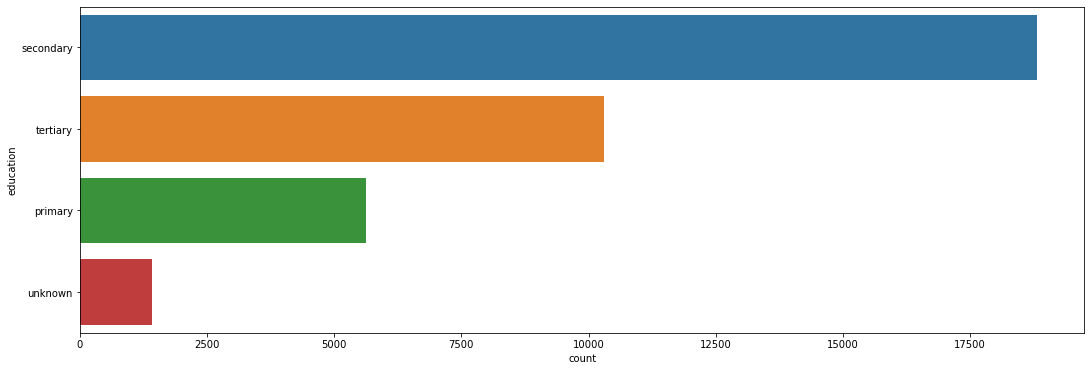

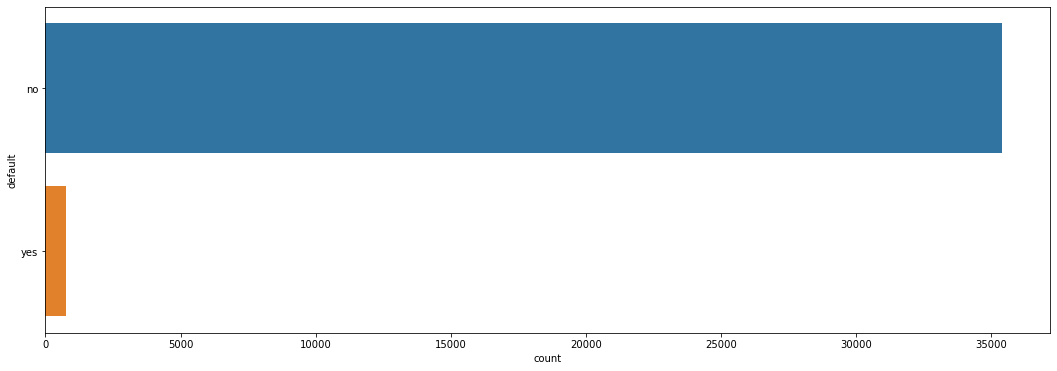

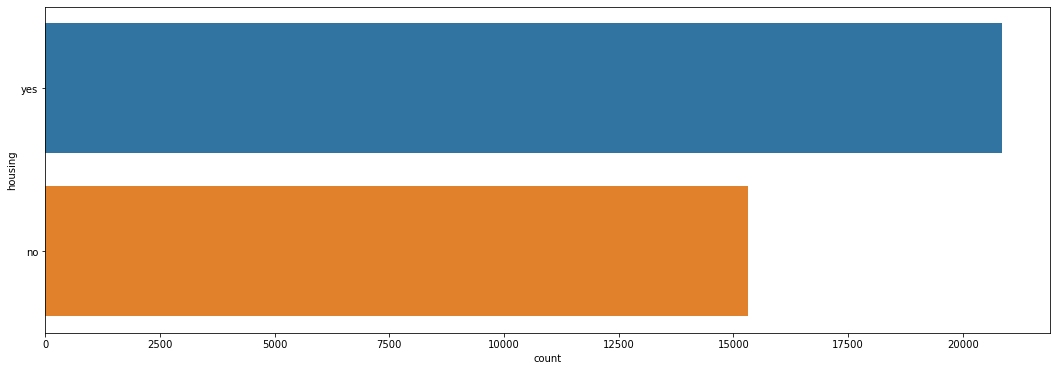

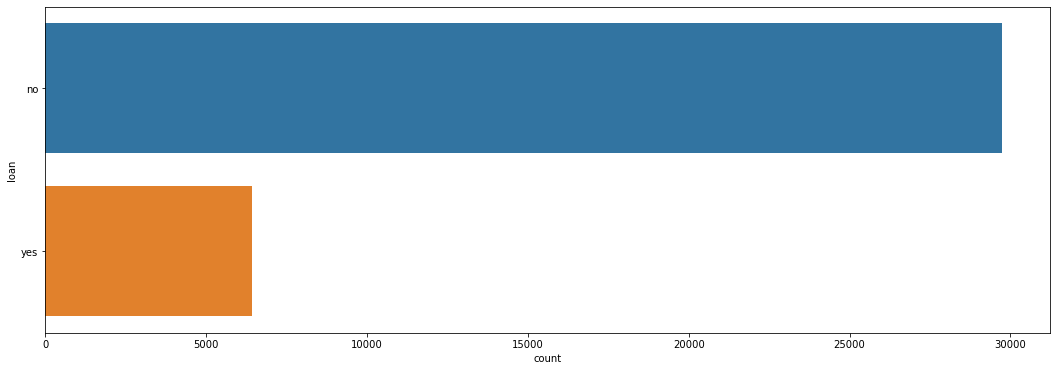

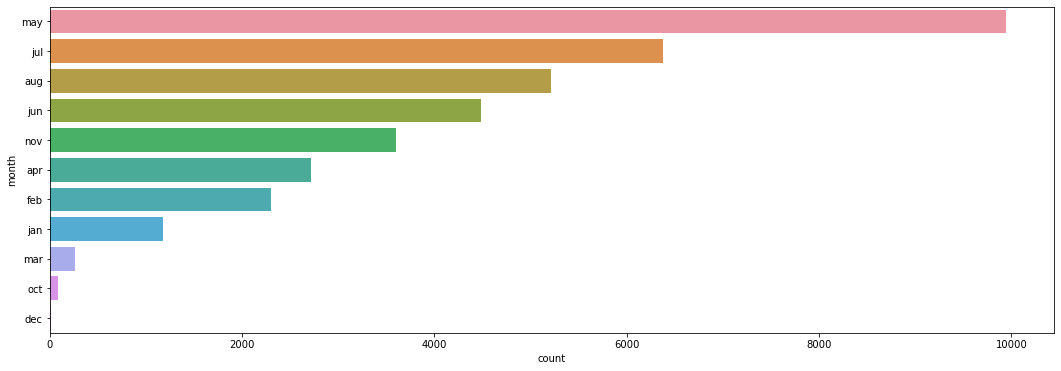

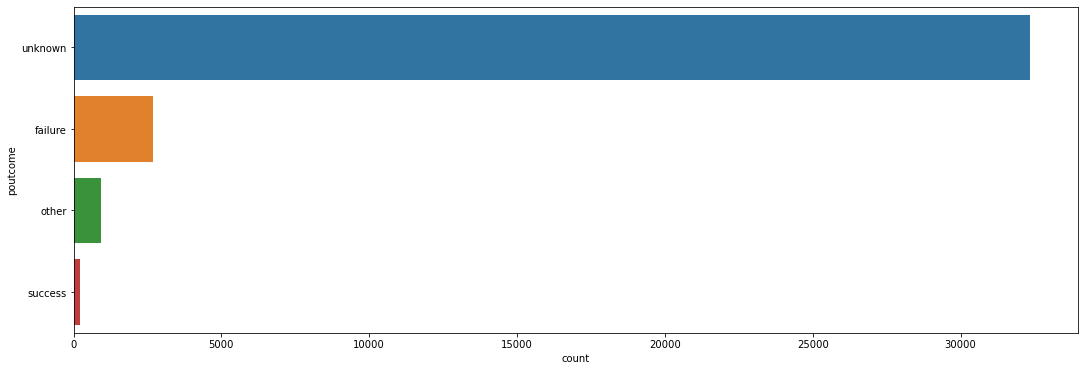

In [19]:
#Univariate Analysis of Categorical Features

for c in cat_cols:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(y =c, data = data,order = data[c].value_counts().index)

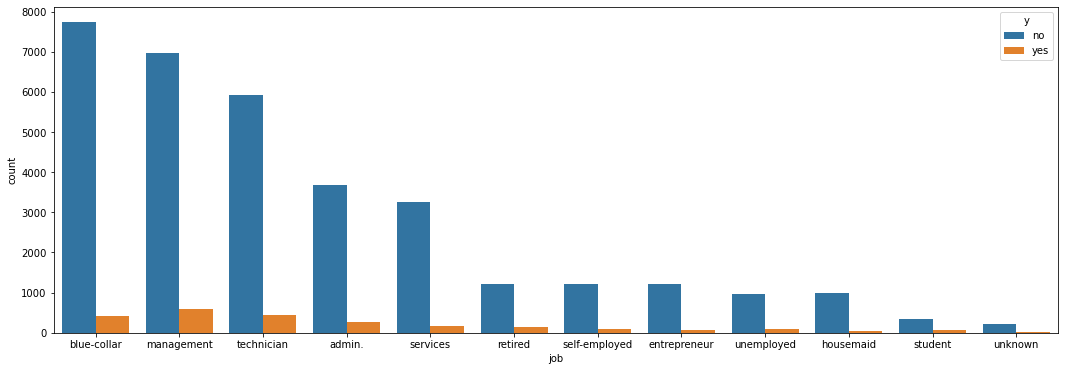

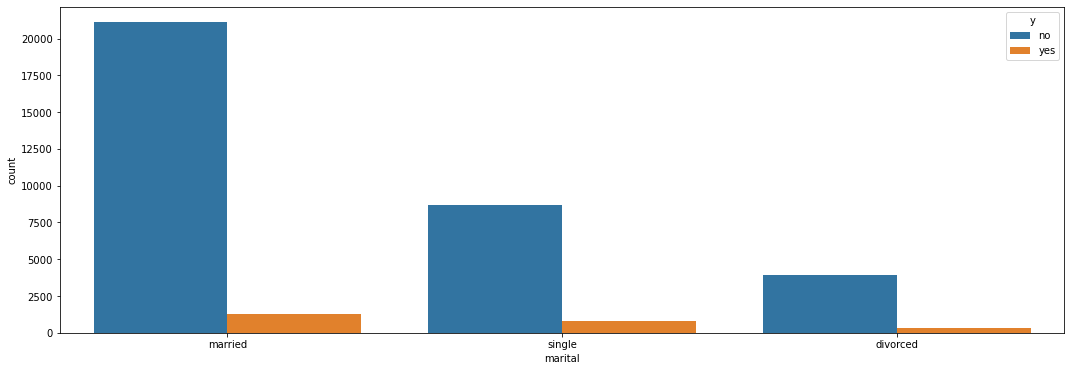

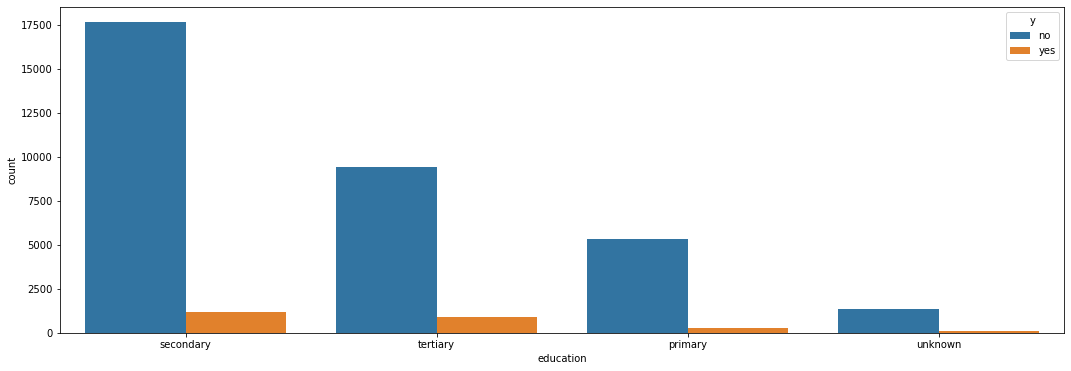

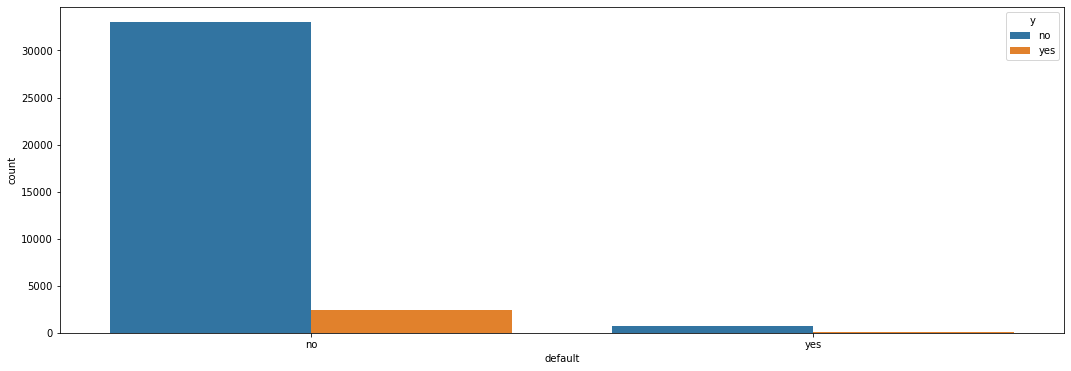

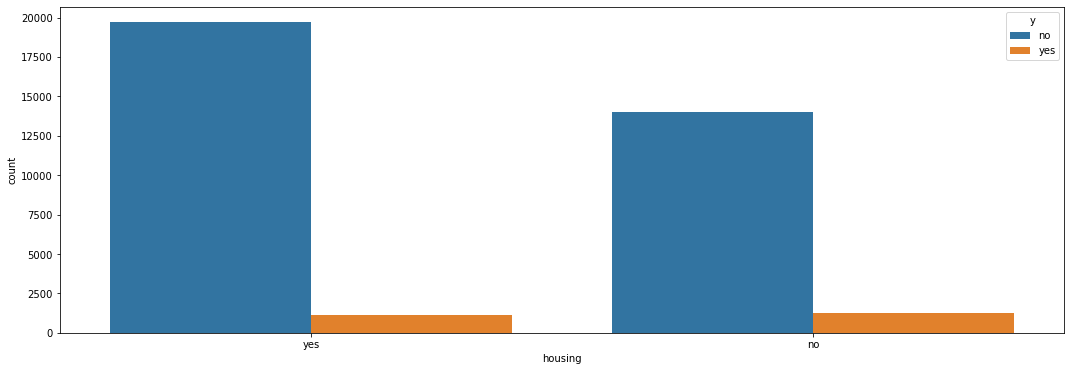

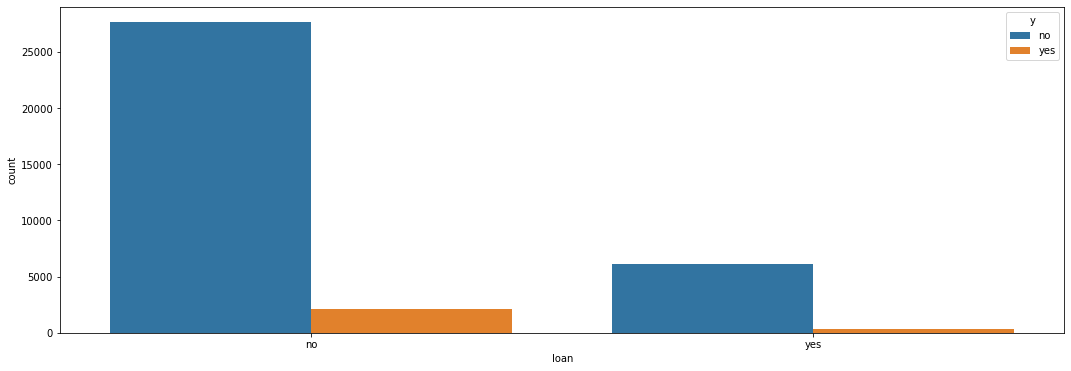

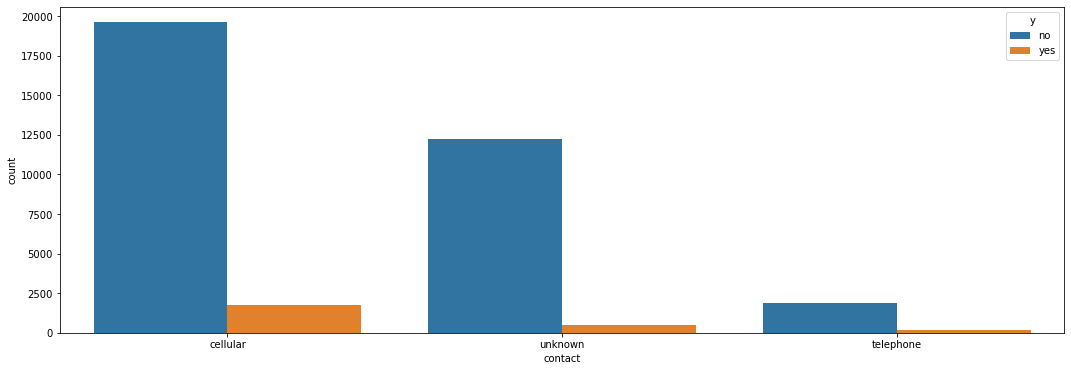

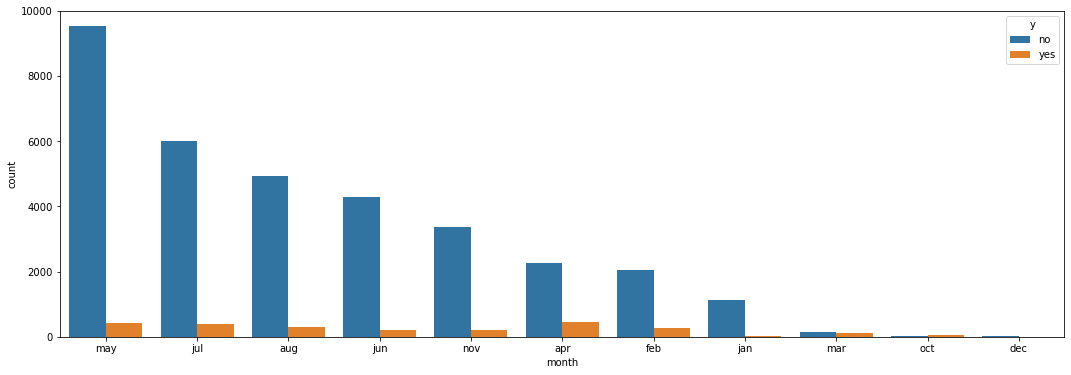

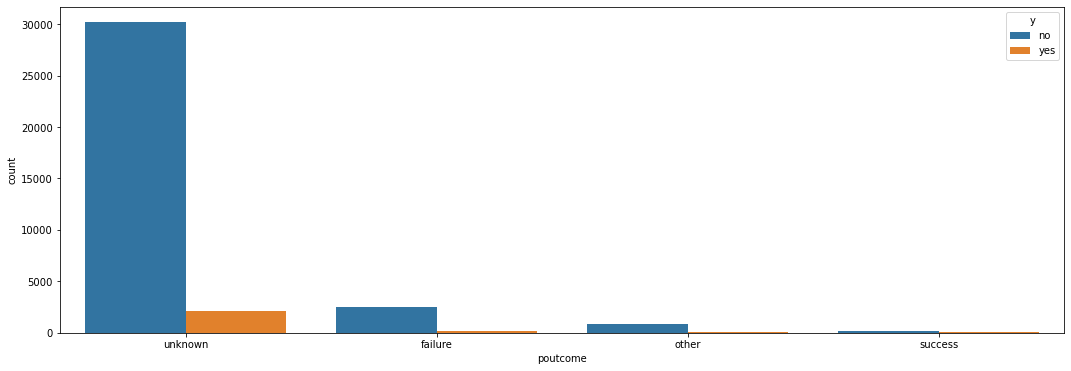

In [20]:
#Bivariate Analysis of Categorical Features with target

for c in cat_cols:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='y',data = data,order = data[c].value_counts().index)

In [21]:
#Analysis from Graphs:-

#Contact :- more celluar contact is been preferred compare to telephone
#month of year :- most of the people are contacted on month of APRIL
#Poutcome :- doesnot give much idea on term deposit subsciber

In [22]:
#jobs

data['y'] = data['y'].replace(['no','yes'],[0,1]) #needed for mathematical operations
data.head()

#no of clients who subscribed to the term deposit grouped by occupation
total_subscribers = data.groupby('job').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by occupation
proportion_subscribed = (round(data.groupby('job').y.sum()/data.groupby('job').y.count(),3)*100).values

# Total amount of clients per occupation
total_people = data.groupby('job').y.count().values

#Form a dataframe and print
jobs = sorted(data.job.unique()) #list of all jobs
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

Job  Total Subscribers  Total People in Job  \
8         student                 61                  416   
5         retired                140                 1367   
10     unemployed                 87                 1042   
4      management                588                 7557   
6   self-employed                 99                 1305   
11        unknown                 17                  229   
0          admin.                275                 3967   
9      technician                431                 6348   
2    entrepreneur                 78                 1296   
1     blue-collar                430                 8166   
7        services                181                 3444   
3       housemaid                 46                 1031   

    Proportion of Subscribers  
8                        14.7  
5                        10.2  
10                        8.3  
4                         7.8  
6                         7.6  
11                        7.4  
0                         6.9  
9                         6.8  
2                         6.0  
1                         5.3  
7                         5.3  
3                         4.5

# Jobs-->students and retired people are more responding to subscribe to term deposit.Whereas we have more people under Blue-collar, techncian and Admin role.

In [23]:
#marital
#no of clients who subscribed to the term deposit grouped by marital status
total_subscribers = data.groupby('marital').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by marital
proportion_subscribed = (round(data.groupby('marital').y.sum()/data.groupby('marital').y.count(),3)*100).values

# Total amount of clients per marital status
total_people = data.groupby('marital').y.count().values

#Form a dataframe and print
marital = sorted(data.marital.unique()) #list of all marital status
marital_with_subscribers = pd.DataFrame({'marital': marital, 'Total Subscribers':total_subscribers,'Total People in marital': total_people,'Proportion of Subscribers': proportion_subscribed})
marital_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

marital  Total Subscribers  Total People in marital  \
2    single                826                     9494   
0  divorced                334                     4285   
1   married               1273                    22389   

   Proportion of Subscribers  
2                        8.7  
0                        7.8  
1                        5.7

# Marital -->Single and divorced people are more resonding to subscribe to term deposit.Whereas we have more people under married status.

In [24]:
#Education
#no of clients who subscribed to the term deposit grouped by education
total_subscribers = data.groupby('education').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by education
proportion_subscribed = (round(data.groupby('education').y.sum()/data.groupby('education').y.count(),3)*100).values

# Total amount of clients per marital status
total_people = data.groupby('education').y.count().values

#Form a dataframe and print
education = sorted(data.education.unique()) #list of all education
education_with_subscribers = pd.DataFrame({'education': education, 'Total Subscribers':total_subscribers,'Total People in education': total_people,'Proportion of Subscribers': proportion_subscribed})
education_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

education  Total Subscribers  Total People in education  \
2   tertiary                884                      10309   
1  secondary               1166                      18809   
3    unknown                 83                       1423   
0    primary                300                       5627   

   Proportion of Subscribers  
2                        8.6  
1                        6.2  
3                        5.8  
0                        5.3

# Education -->Tertiary and Secondary people are more resonding to subscribe to term deposit.Whereas we have more people under primary status still.

In [25]:
#loan
#no of clients who subscribed to the term deposit grouped by loan
total_subscribers = data.groupby('loan').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by loan
proportion_subscribed = (round(data.groupby('loan').y.sum()/data.groupby('loan').y.count(),3)*100).values

# Total amount of clients
total_people = data.groupby('loan').y.count().values

#Form a dataframe and print
loan = sorted(data.loan.unique()) 
loan_with_subscribers = pd.DataFrame({'loan': loan, 'Total Subscribers':total_subscribers,'Total People in loan': total_people,'Proportion of Subscribers': proportion_subscribed})
loan_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

loan  Total Subscribers  Total People in loan  Proportion of Subscribers
0   no               2106                 29737                        7.1
1  yes                327                  6431                        5.1

# loans--> People have loans are less likely to invest in term deposit.

In [26]:
#housing
#no of clients who subscribed to the term deposit grouped by housing
total_subscribers = data.groupby('housing').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by housing
proportion_subscribed = (round(data.groupby('housing').y.sum()/data.groupby('housing').y.count(),3)*100).values

# Total amount of clients per housing
total_people = data.groupby('housing').y.count().values

#Form a dataframe and print
housing = sorted(data.housing.unique()) 
housing_with_subscribers = pd.DataFrame({'housing': housing, 'Total Subscribers':total_subscribers,'Total People in housing': total_people,'Proportion of Subscribers': proportion_subscribed})
housing_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

housing  Total Subscribers  Total People in housing  \
0      no               1280                    15311   
1     yes               1153                    20857   

   Proportion of Subscribers  
0                        8.4  
1                        5.5

# housing loans--> People having housing loans are less likely to invest in term deposit.

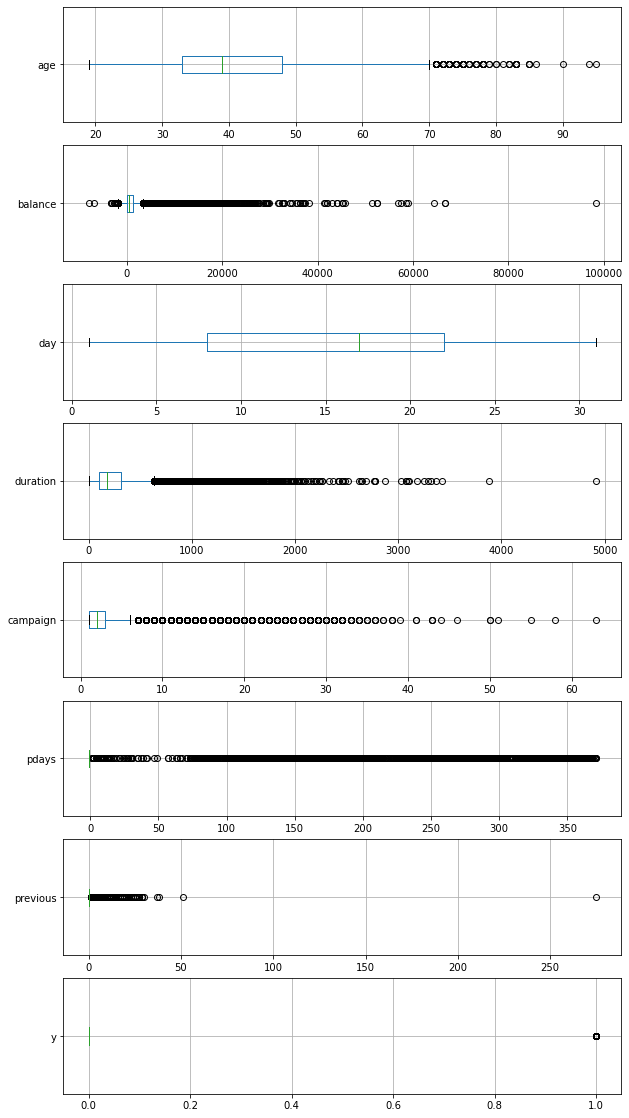

In [27]:
#Numerical Analysis

#Univariate Analysis using Boxplots -  to check outliers in numerical data set
fig, axes = plt.subplots(8, 1, figsize=(10, 20))
for i, c in enumerate(num_cols):
    data[[c]].boxplot(ax=axes[i], vert=False)


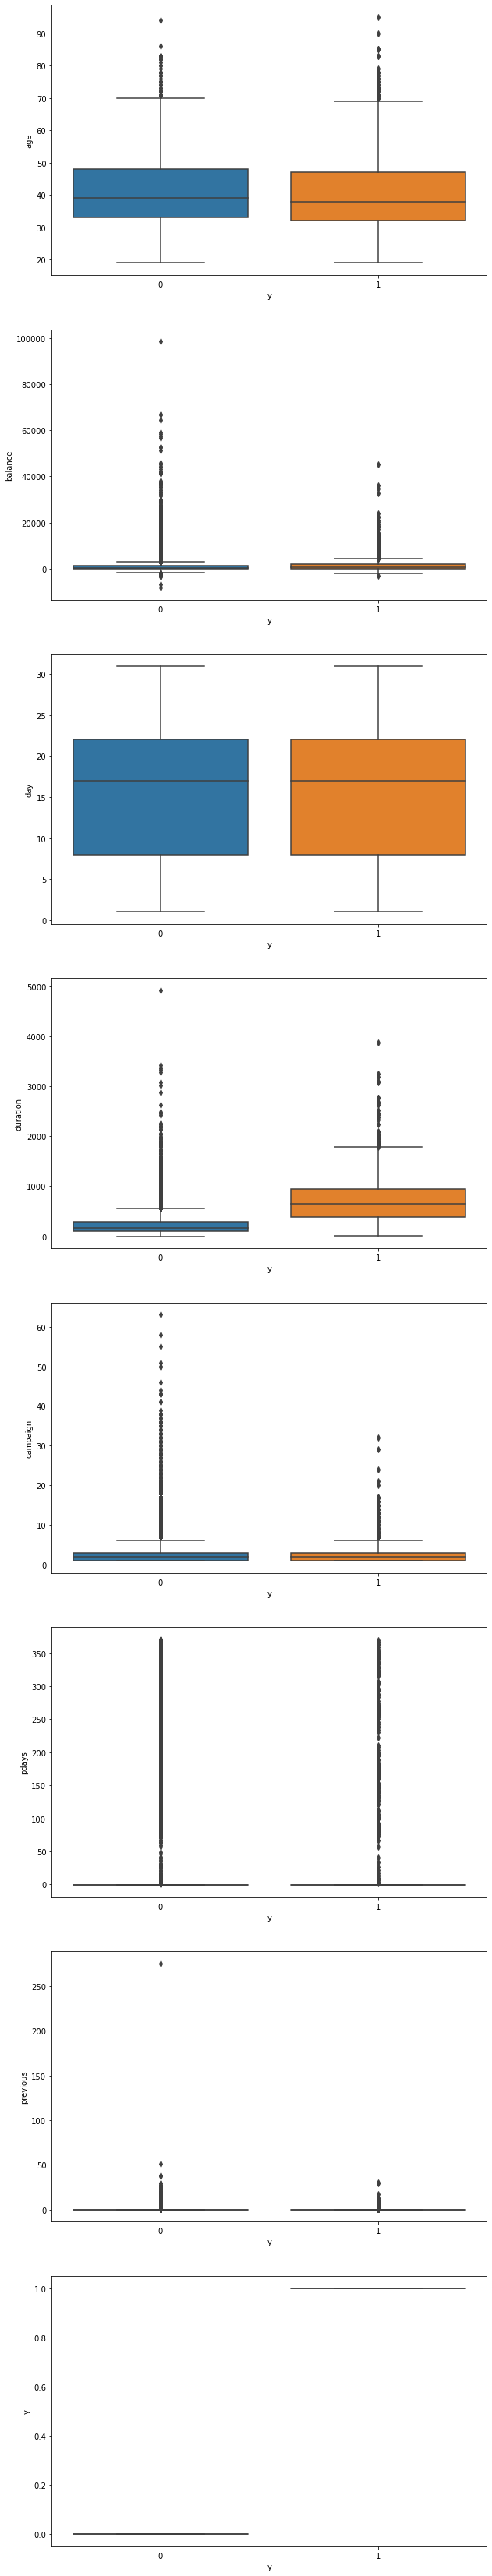

In [28]:
fig, axes = plt.subplots(8, 1, figsize=(10, 60))
for i, c in enumerate(num_cols):
  sns.boxplot(data=data,x='y',y=c,ax=axes[i])

In [29]:
#Based on above mentioned Boxplot we can see these features doenot help us much to understand which client will subscribe to term deposit 
#and which will not.

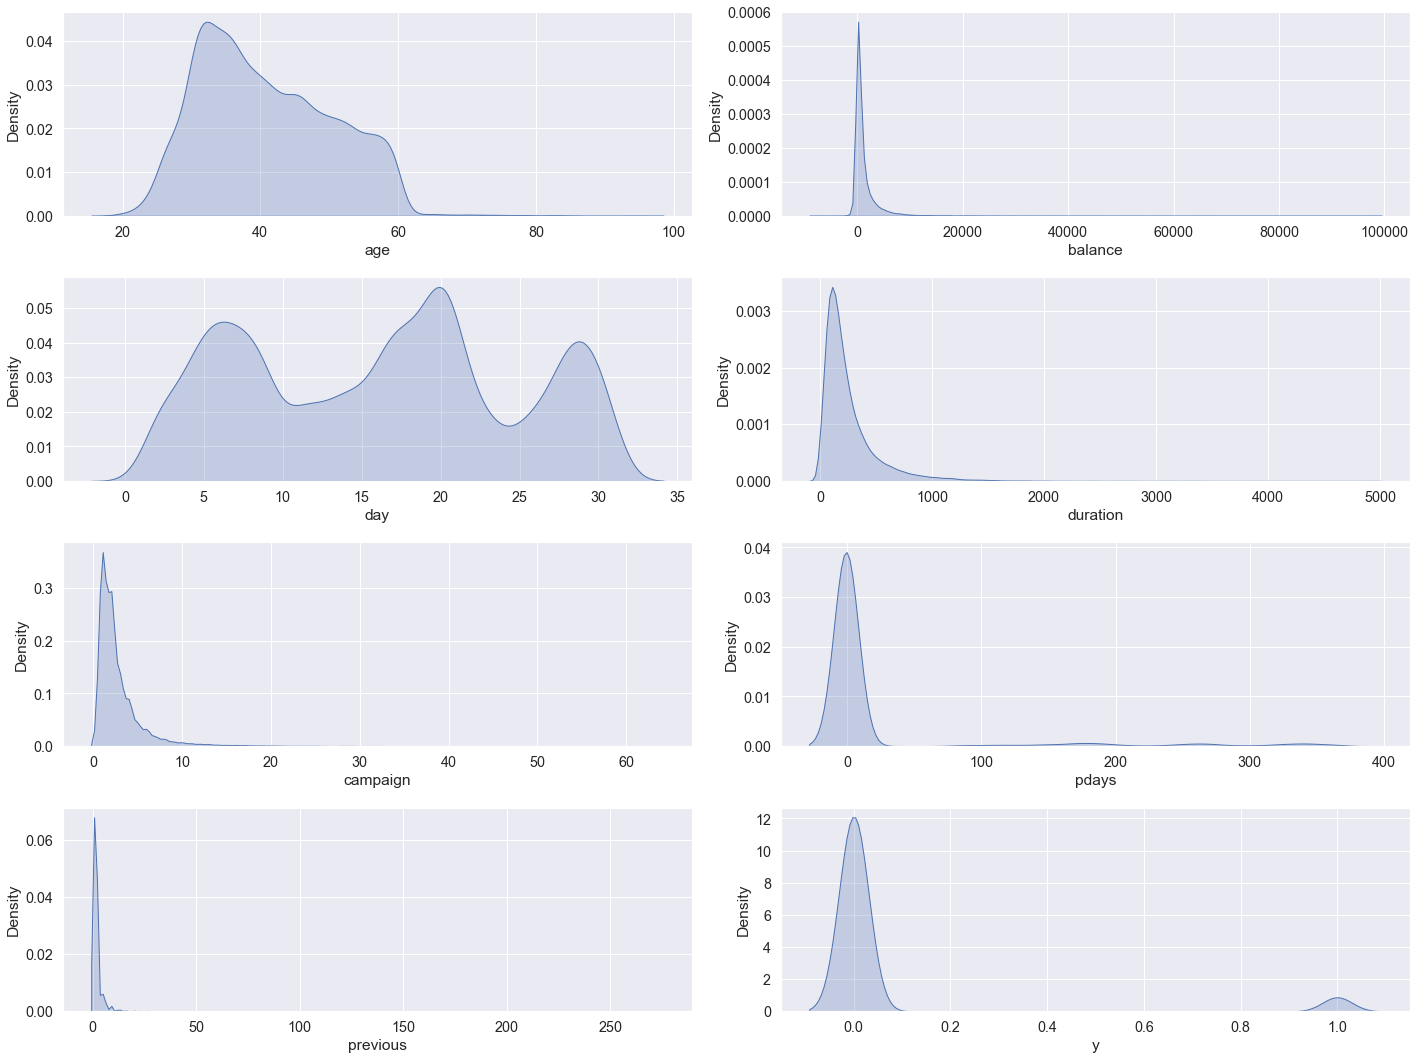

In [30]:
#Univariate Analysis using Density Plots

#kernel density estimate (KDE) plot 

sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

-previous: number of contacts performed before this campaign and for this client (numeric)

Here..Most of the values are 0 .. Number of contact performed before this campaing was very less.

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Here also from the above graph we can see most of the values lies under 0 ,-1, +1.

In [31]:
# Bivariate Analysis KDE plots - Relationships with Target Variable

sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, hue='y', multiple='fill', ax=axes[i])
plt.tight_layout()

C:\Users\Satish\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


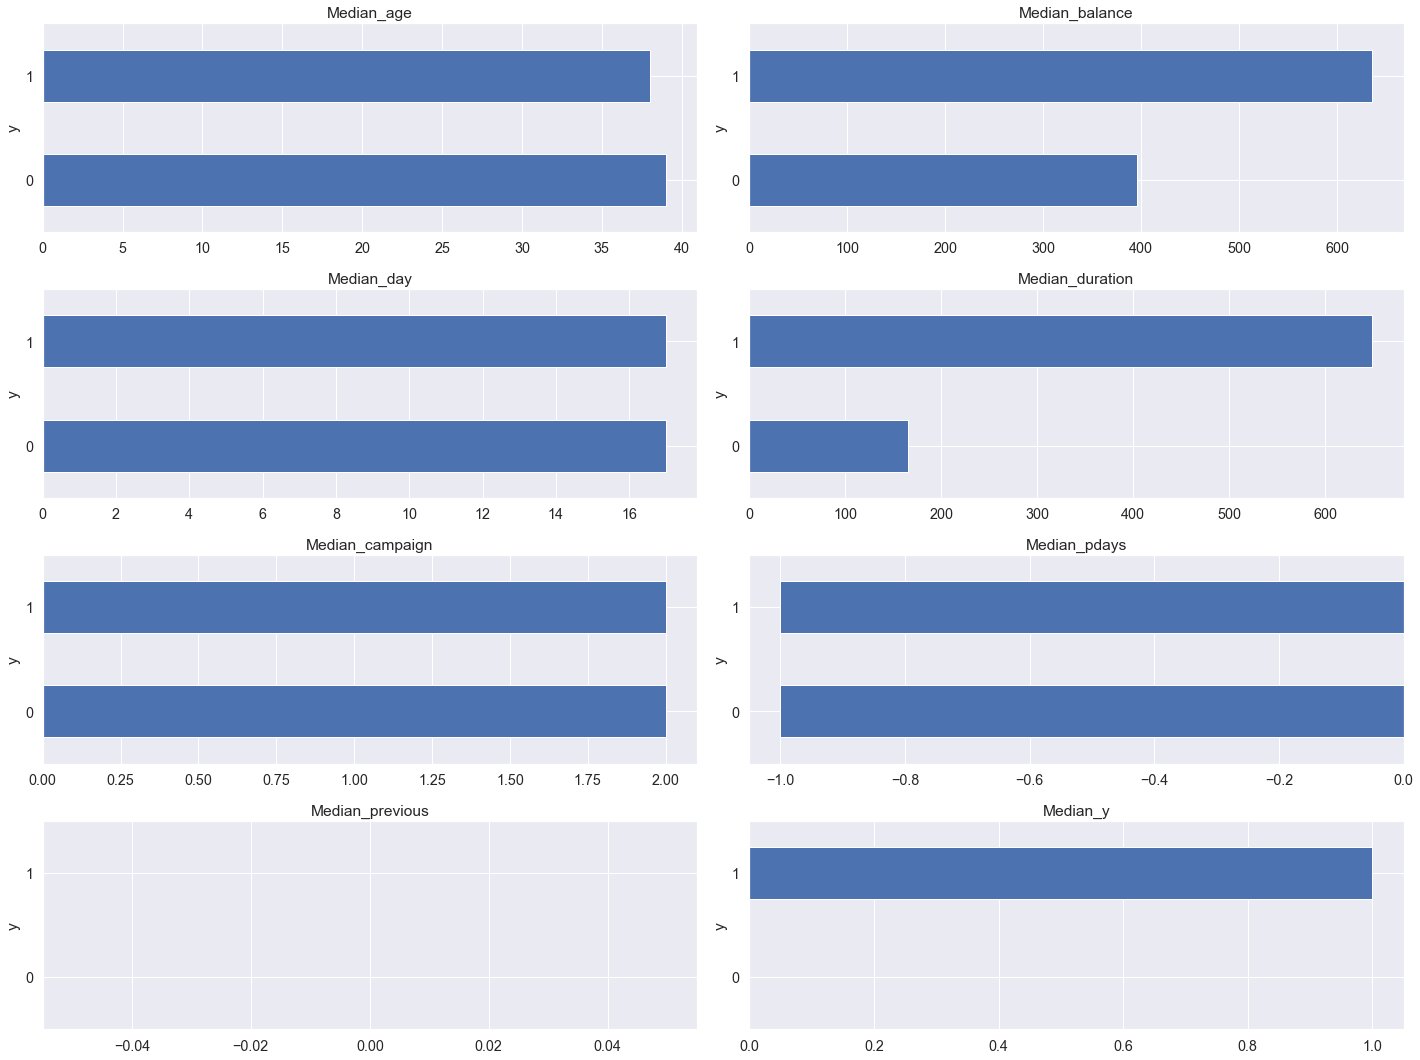

In [32]:
#For each numerical Variable. We will plot the median of the numerical variable for:
#1. When target col == 'no' i.e.0
#2. when target col == 'yes'i.e.1

#We are choosing median since median is not affected by outliers, and our data has outliers

sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = data.groupby('y')[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

# AGE:-Median of Age for Subscibers and Non Subscribers have not much difference.
We cannot decide which age group of people young (>18 yrs to <60 yrs) and old ( >60 yrs) can subscibe to trm deposit
other that from 35-40 age (Median)

In [33]:
n1=len(data[(data['age'] > 60) & (data['y'] == 1)]) #number of old subscribers
n2=len(data[(data['age'] > 60) & (data['y'] == 0)]) #number of old non-subscribers
n3=len(data[(data['age'] <= 60) & (data['y'] == 1)]) #number of young subscribers
n4=len(data[(data['age'] <= 60) & (data['y'] == 0)]) #number of young non-subscribers

print(f'Proportion of young subscribers is: {n3/(n3+n4)} and the proportion of old subscribers is {n1/(n1+n2)}')

Proportion of young subscribers is: 0.06517504313463572 and the proportion of old subscribers is 0.3888888888888889


# Proportion of Young Subscibers are less compare to old.
#OLD customer are more likely to subscibe to term deposits

# Balance :Customer having High Balance are more likely to subscribe to term deposit as per the Median calculated from above graph

# DAY,Campaign and Pdays doesnot help us to identify who will subscribe and wh will not.

# Previous is also not helpful to understand target feture 

# High the duration of call made High the possibility the customer will subscribe t term deposit as per above graph 

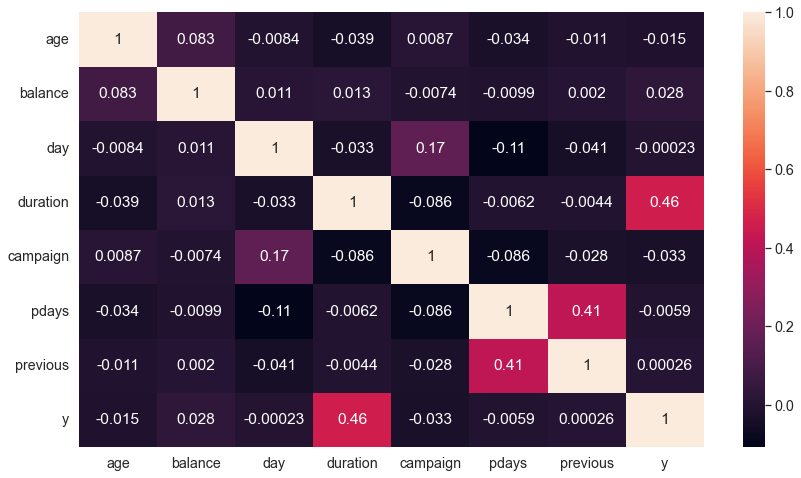

In [34]:
#Bivariate Analysis - Correlation Heatmaps

plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[num_cols].corr(), annot=True)

# Feature Engineering 


In [35]:
data['y'].value_counts()

0    33735
1     2433
Name: y, dtype: int64

In [36]:
data3 = data.copy()

In [37]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.0+ MB


In [38]:
data.groupby(['y','default']).size()

y  default
0  no         33007
   yes          728
1  no          2386
   yes           47
dtype: int64

In [39]:
#More than 90% feture has default has no ..so will drop

In [40]:
data.drop(['default'],axis = 1,inplace = True)

In [41]:
data['y'].value_counts()

0    33735
1     2433
Name: y, dtype: int64

In [42]:
data.groupby(['y','pdays']).size()

y  pdays
0  -1       30194
    1           3
    2          34
    4           1
    5          11
            ...  
1   363         1
    364         1
    366         1
    367         1
    370         1
Length: 500, dtype: int64

In [43]:
#dropping pdays has around 95% as -1 ..so lets drop this as well

In [44]:
data.drop(['pdays'],axis = 1,inplace = True)

In [45]:
#Capping - Outliers treatment

tenth_percentile = np.percentile(data['age'], 0)
ninetieth_percentile = np.percentile(data['age'], 99)
# print(tenth_percentile, ninetieth_percentile)
b = np.where(data['age']<tenth_percentile, tenth_percentile, data['age'])
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:", b)

New array: [58. 44. 33. ... 40. 45. 41.]


In [46]:
data['age'] = b

In [47]:
data['age'].min()

19.0

In [48]:
data['age'].max()

60.0

In [49]:
data.groupby(['y','age']).size()

y  age 
0  19.0     10
   20.0     17
   21.0     24
   22.0     49
   23.0     95
          ... 
1  56.0     35
   57.0     34
   58.0     37
   59.0     49
   60.0    124
Length: 84, dtype: int64

In [50]:
data.groupby(['y','age']).size()

y  age 
0  19.0     10
   20.0     17
   21.0     24
   22.0     49
   23.0     95
          ... 
1  56.0     35
   57.0     34
   58.0     37
   59.0     49
   60.0    124
Length: 84, dtype: int64

In [51]:
data.groupby(['y','balance']).size()

y  balance
0  -8019      1
   -6847      1
   -3372      1
   -3313      1
   -2827      1
             ..
1   23878     1
    32685     1
    34646     1
    36252     1
    45248     1
Length: 8007, dtype: int64

In [52]:
#customer with -ve or less balance are least interest for term deposit whereas people with more or +ve balance are more interested.

In [53]:
data.groupby(['y','duration']).size()

y  duration
0  0           2
   1           1
   2           3
   3           4
   4           4
              ..
1  3094        1
   3102        1
   3183        1
   3253        1
   3881        1
Length: 2422, dtype: int64

In [54]:
# less duration less interest in term deposit compare to more duration more probbility to subscription

In [55]:
data.groupby(['y','campaign'], axis=0, level=None, as_index=True, sort=True,  observed=False)['campaign'].count()

y  campaign
0  1           12095
   2            9516
   3            4204
   4            2824
   5            1373
               ...  
1  20              1
   21              1
   24              1
   29              1
   32              1
Name: campaign, Length: 70, dtype: int64

In [56]:
datas_3 = data[data['campaign']<33]

In [57]:
datas_3.groupby(['y','campaign'], axis=0, level=None, as_index=True, sort=True,  observed=False)['campaign'].count()

y  campaign
0  1           12095
   2            9516
   3            4204
   4            2824
   5            1373
   6            1044
   7             590
   8             452
   9             278
   10            237
   11            171
   12            146
   13            125
   14             88
   15             76
   16             76
   17             63
   18             51
   19             44
   20             42
   21             34
   22             23
   23             22
   24             19
   25             22
   26             13
   27             10
   28             16
   29             15
   30              8
   31             12
   32              8
1  1            1015
   2             645
   3             300
   4             196
   5              81
   6              66
   7              31
   8              25
   9              18
   10             12
   11             13
   12              4
   13              6
   14              4
   15              4
 

In [58]:
datas_3.groupby(['y','previous'], axis=0, level=None, as_index=True, sort=True,  observed=False)['previous'].count()

y  previous
0  0           30156
   1            1272
   2             977
   3             447
   4             296
   5             166
   6              83
   7              75
   8              49
   9              41
   10             13
   11             22
   12             18
   13             14
   14              9
   15             13
   16              6
   17              4
   18              4
   19              3
   20              5
   21              2
   22              1
   23              4
   24              3
   25              3
   26              1
   27              4
   29              2
   37              1
   38              1
   51              1
   275             1
1  0            2156
   1             112
   2              66
   3              37
   4              17
   5              13
   6              13
   7               7
   8               3
   9               2
   10              1
   11              1
   13              2
   17              1
 

In [59]:
data4 = datas_3[datas_3['previous']<29]

In [60]:
data4.groupby(['y','previous'], axis=0, level=None, as_index=True, sort=True,  observed=False)['previous'].count()

y  previous
0  0           30156
   1            1272
   2             977
   3             447
   4             296
   5             166
   6              83
   7              75
   8              49
   9              41
   10             13
   11             22
   12             18
   13             14
   14              9
   15             13
   16              6
   17              4
   18              4
   19              3
   20              5
   21              2
   22              1
   23              4
   24              3
   25              3
   26              1
   27              4
1  0            2156
   1             112
   2              66
   3              37
   4              17
   5              13
   6              13
   7               7
   8               3
   9               2
   10              1
   11              1
   13              2
   17              1
Name: previous, dtype: int64

In [61]:
data4.head()
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36122 entries, 0 to 36167
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        36122 non-null  float64
 1   job        36122 non-null  object 
 2   marital    36122 non-null  object 
 3   education  36122 non-null  object 
 4   balance    36122 non-null  int64  
 5   housing    36122 non-null  object 
 6   loan       36122 non-null  object 
 7   contact    36122 non-null  object 
 8   day        36122 non-null  int64  
 9   month      36122 non-null  object 
 10  duration   36122 non-null  int64  
 11  campaign   36122 non-null  int64  
 12  previous   36122 non-null  int64  
 13  poutcome   36122 non-null  object 
 14  y          36122 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 4.4+ MB


In [62]:
#TARGET_COL='y'

data4['y'].value_counts(normalize='True')

#NO i.e 0 is in majority

0    0.9327
1    0.0673
Name: y, dtype: float64

In [63]:
data4.head()

age           job  marital  education  balance housing loan  contact  day  \
0  58.0    management  married   tertiary     2143     yes   no  unknown    5   
1  44.0    technician   single  secondary       29     yes   no  unknown    5   
2  33.0  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3  47.0   blue-collar  married    unknown     1506     yes   no  unknown    5   
4  33.0       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign  previous poutcome  y  
0   may       261         1         0  unknown  0  
1   may       151         1         0  unknown  0  
2   may        76         1         0  unknown  0  
3   may        92         1         0  unknown  0  
4   may       198         1         0  unknown  0

In [64]:
features_1 = [c for c in data4.columns if c not in ['y']]
len(features_1)

14

Iteration 1

In [65]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data4, test_size=0.33)
print(train.shape)
print(test.shape)

(24201, 15)
(11921, 15)


In [66]:
#Input to our model will be the features
train_X, test_X = train[features_1], test[features_1]

#Output of our model will be the TARGET_COL
train_y, test_y = train['y'], test['y']

In [67]:
train_y.shape, test_y.shape

((24201,), (11921,))

In [68]:
preds_test = np.zeros(len(test_X))
print(preds_test)
print(test_y)

[0. 0. 0. ... 0. 0. 0.]
29280    0
1818     0
18924    0
29728    0
34073    1
        ..
2956     0
12200    0
27267    0
12945    0
24794    0
Name: y, Length: 11921, dtype: int64


In [69]:
#As Y = 0 ('no') is the majority class. Lets begin by predicting everything as 0 ('no').
preds_test = np.zeros(len(test_X))

#accuracy,f1 on test data 
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(test_y, preds_test)
f1 = f1_score(test_y, preds_test)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.9355758745071722
F1 score is: 0.0


In [70]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[11153     0]
 [  768     0]]


In [71]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.5


We have to improve this F1-score and AUC Score by creating more intelligent models.

#Iteration Two :

In [72]:
train.shape,test.shape

((24201, 15), (11921, 15))

In [73]:
train.head()

age           job  marital  education  balance housing loan  \
33487  45.0        admin.  married    unknown    13562     yes   no   
34599  35.0        admin.  married  secondary        1     yes  yes   
10339  57.0  entrepreneur  married    unknown      657      no   no   
2601   44.0    technician  married  secondary     3790     yes   no   
13045  60.0    management  married    primary       75      no  yes   

         contact  day month  duration  campaign  previous poutcome  y  
33487  telephone   20   apr        16        12         0  unknown  0  
34599   cellular    5   may        58         1         0  unknown  0  
10339    unknown   12   jun       344         1         0  unknown  0  
2601     unknown   13   may       342         2         0  unknown  0  
13045   cellular    8   jul       183         1         0  unknown  0

In [74]:
#Concatenate/Join the train and test Datasets. 
#All kinds of processing must be performed on both train and test datasets together.
dframe = pd.concat([train, test], axis=0).reset_index(drop = True) #reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.
dframe.shape

(36122, 15)

In [75]:
dframe.head()

age           job  marital  education  balance housing loan    contact  \
0  45.0        admin.  married    unknown    13562     yes   no  telephone   
1  35.0        admin.  married  secondary        1     yes  yes   cellular   
2  57.0  entrepreneur  married    unknown      657      no   no    unknown   
3  44.0    technician  married  secondary     3790     yes   no    unknown   
4  60.0    management  married    primary       75      no  yes   cellular   

   day month  duration  campaign  previous poutcome  y  
0   20   apr        16        12         0  unknown  0  
1    5   may        58         1         0  unknown  0  
2   12   jun       344         1         0  unknown  0  
3   13   may       342         2         0  unknown  0  
4    8   jul       183         1         0  unknown  0

In [76]:
cat_column = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in  cat_column:
    dframe = pd.concat([dframe.drop(col, axis=1),pd.get_dummies(dframe[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [77]:
bool_columns = ['housing', 'loan']
for col in  bool_columns:
    dframe[col+'_new']=dframe[col].apply(lambda x : 1 if x == 'yes' else 0)
    dframe.drop(col, axis=1, inplace=True)

In [78]:
temp_dict = {'jan': 1, 'feb': 2, 'mar': 3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
# mapping values in column from dictionary
dframe['month_new'] = dframe.month.map(temp_dict)
dframe = dframe.drop(['month'], axis=1)


In [79]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36122 entries, 0 to 36121
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36122 non-null  float64
 1   balance              36122 non-null  int64  
 2   day                  36122 non-null  int64  
 3   duration             36122 non-null  int64  
 4   campaign             36122 non-null  int64  
 5   previous             36122 non-null  int64  
 6   y                    36122 non-null  int64  
 7   job_blue-collar      36122 non-null  uint8  
 8   job_entrepreneur     36122 non-null  uint8  
 9   job_housemaid        36122 non-null  uint8  
 10  job_management       36122 non-null  uint8  
 11  job_retired          36122 non-null  uint8  
 12  job_self-employed    36122 non-null  uint8  
 13  job_services         36122 non-null  uint8  
 14  job_student          36122 non-null  uint8  
 15  job_technician       36122 non-null 

In [80]:
x = dframe.drop(['y'],axis=1)
y = dframe['y']


In [81]:
x.shape,y.shape

((36122, 30), (36122,))

In [82]:
y.value_counts()

0    33691
1     2431
Name: y, dtype: int64

In [83]:
x.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_telephone      0
contact_unknown        0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
housing_new            0
loan_new               0
month_new              0
dtype: int64

# Milestone 4 - Data Modelling

In [84]:
from sklearn.preprocessing import StandardScaler
#scaling
scl = StandardScaler() 
#scl the feature based on mean and std ...i have preferd standrisation coz features can take form of normal distribution
#this will make models to learn weights easily and also will make less sentive to outliers 
scl.fit(x)

StandardScaler()

In [85]:
x_scl = pd.DataFrame(scl.transform(x))
#xtest_scl = pd.DataFrame(scl.fit_transform(xtest))
x_scl.columns = x.columns 
#xtrain_scl.columns = xtrain.columns 

In [86]:
x_scl.head()


age   balance       day  duration  campaign  previous  \
0  0.443016  4.223027  0.450122 -0.920509  2.919948 -0.231598   
1 -0.609227 -0.442924 -1.310126 -0.759277 -0.606808 -0.231598   
2  1.705706 -0.217213 -0.488677  0.338637 -0.606808 -0.231598   
3  0.337791  0.860762 -0.371327  0.330959 -0.286194 -0.231598   
4  2.021379 -0.417463 -0.958077 -0.279420 -0.606808 -0.231598   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
0        -0.539994         -0.192754      -0.171323       -0.513789  ...   
1        -0.539994         -0.192754      -0.171323       -0.513789  ...   
2        -0.539994          5.187966      -0.171323       -0.513789  ...   
3        -0.539994         -0.192754      -0.171323       -0.513789  ...   
4        -0.539994         -0.192754      -0.171323        1.946324  ...   

   education_tertiary  education_unknown  contact_telephone  contact_unknown  \
0           -0.631316           4.947111           4.129404        -0.738686   
1           -0.631316          -0.202138          -0.242166        -0.738686   
2           -0.631316           4.947111          -0.242166         1.353755   
3           -0.631316          -0.202138          -0.242166         1.353755   
4           -0.631316          -0.202138          -0.242166        -0.738686   

   poutcome_other  poutcome_success  poutcome_unknown  housing_new  loan_new  \
0       -0.162293          -0.07647          0.343384     0.857010 -0.465004   
1       -0.162293          -0.07647          0.343384     0.857010  2.150518   
2       -0.162293          -0.07647          0.343384    -1.166847 -0.465004   
3       -0.162293          -0.07647          0.343384     0.857010 -0.465004   
4       -0.162293          -0.07647          0.343384    -1.166847  2.150518   

   month_new  
0  -0.880157  
1  -0.463029  
2  -0.045902  
3  -0.463029  
4   0.371225  

[5 rows x 30 columns]

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Multicolinarity check using VIF

vif = pd.DataFrame()
X =  pd.DataFrame(x_scl)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#A rule of thumb for interpreting the variance inflation factor:

#1 = not correlated.
#Between 1 and 5 = moderately correlated.
#Greater than 5 = highly correlated.

Features   VIF
20   education_tertiary  3.33
9        job_management  3.12
18       marital_single  2.71
6       job_blue-collar  2.61
19  education_secondary  2.54
17      marital_married  2.42
26     poutcome_unknown  2.29
14       job_technician  2.19
5              previous  1.87
12         job_services  1.70
0                   age  1.47
10          job_retired  1.46
11    job_self-employed  1.35
7      job_entrepreneur  1.34
24       poutcome_other  1.34
8         job_housemaid  1.31
23      contact_unknown  1.30
21    education_unknown  1.28
15       job_unemployed  1.25
27          housing_new  1.19
29            month_new  1.15
13          job_student  1.14
16          job_unknown  1.09
25     poutcome_success  1.08
22    contact_telephone  1.06
2                   day  1.06
4              campaign  1.05
1               balance  1.04
28             loan_new  1.03
3              duration  1.01

In [88]:
#x_scl.drop('contact_unknown',axis=1,inplace=True)# because of VIF inporvement


In [89]:
# vif = pd.DataFrame()
# X =  pd.DataFrame(x_scl)
# vif['Features'] = x_scl.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [90]:
#VIF is less than 5 for all varibles.

In [91]:
x_scl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36122 entries, 0 to 36121
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36122 non-null  float64
 1   balance              36122 non-null  float64
 2   day                  36122 non-null  float64
 3   duration             36122 non-null  float64
 4   campaign             36122 non-null  float64
 5   previous             36122 non-null  float64
 6   job_blue-collar      36122 non-null  float64
 7   job_entrepreneur     36122 non-null  float64
 8   job_housemaid        36122 non-null  float64
 9   job_management       36122 non-null  float64
 10  job_retired          36122 non-null  float64
 11  job_self-employed    36122 non-null  float64
 12  job_services         36122 non-null  float64
 13  job_student          36122 non-null  float64
 14  job_technician       36122 non-null  float64
 15  job_unemployed       36122 non-null 

In [92]:
#x.drop('contact_unknown',axis=1,inplace=True) # because of VIF inporvement

In [93]:
y.value_counts()

0    33691
1     2431
Name: y, dtype: int64

In [94]:
#split train test split
xtrain,xtest,ytrain,ytest = train_test_split(x_scl,y,test_size=0.4,random_state=14)

# Logistic Regression Model - imbalanced data set

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [96]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [97]:
pred = lr.predict(xtest)

In [98]:
print('Training Score',lr.score(xtrain,ytrain))
print('Testing Score',lr.score(xtest,ytest))

Training Score 0.9383103400544456
Testing Score 0.9384732507439961


In [99]:
#f1 score on test set
f1_score(ytest, pred)

0.3419689119170985

We need to improve f1 score 

In [100]:
print("Confusion Matrix is:")
print(confusion_matrix(ytest, pred))

Confusion Matrix is:
[[13329   131]
 [  758   231]]


In [101]:
pd.crosstab(ytest, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted      0    1    All
Actual                      
0          13329  131  13460
1            758  231    989
All        14087  362  14449

# Treating imbalanced data set - SMOTE

In [102]:
!pip install imblearn

In [103]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_SMOTE, y_SMOTE = oversample.fit_resample(x_scl, y)

In [104]:
from collections import Counter

# summarize the new class distribution
counter = Counter(y_SMOTE)
print(counter)

Counter({0: 33691, 1: 33691})


In [105]:
#split train test split
xtrain_SMOTE,xtest_SMOTE,ytrain_SMOTE,ytest_SMOTE = train_test_split(X_SMOTE,y_SMOTE,test_size=0.2,random_state=14)

# Logistic Regression on Balanced Data set

In [106]:
lr = LogisticRegression()
lr.fit(xtrain_SMOTE,ytrain_SMOTE)
pred_SMOTE = lr.predict(xtest_SMOTE)
print('Training Score',lr.score(xtrain_SMOTE,ytrain_SMOTE))
print('Testing Score',lr.score(xtest_SMOTE,ytest_SMOTE))
#f1 score on test set
f1_score(ytest_SMOTE, pred_SMOTE)


Training Score 0.8511455338094797
Testing Score 0.8500408102693477


0.8491228070175437

In [107]:
print("Confusion Matrix is:")
print(confusion_matrix(ytest_SMOTE, pred_SMOTE))

Confusion Matrix is:
[[5769  968]
 [1053 5687]]


In [108]:
pd.crosstab(ytest_SMOTE, pred_SMOTE, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted     0     1    All
Actual                      
0          5769   968   6737
1          1053  5687   6740
All        6822  6655  13477

Our F1 score is imporved to 84% 

In [109]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest_SMOTE, pred_SMOTE)

print(auc_score1)

0.8500422067954593


AUC SCORE is 85%

# Decision Tree classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1)
_ = dt.fit(xtrain_SMOTE, ytrain_SMOTE)

#predictions on test data
preds_test_DT= dt.predict(xtest_SMOTE)

#f1 score on test set
f1_score(ytest_SMOTE, preds_test_DT)

0.9381420441948118

F1 Score is been improved to 94%

In [111]:
print("Confusion Matrix is:")
print(confusion_matrix(ytest_SMOTE, preds_test_DT))

Confusion Matrix is:
[[6293  444]
 [ 393 6347]]


In [112]:
pd.crosstab(ytest_SMOTE, preds_test_DT, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted     0     1    All
Actual                      
0          6293   444   6737
1           393  6347   6740
All        6686  6791  13477

In [113]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(ytest_SMOTE, preds_test_DT)

print('Decision Tree AUC SCORE: ',auc_score2)

Decision Tree AUC SCORE:  0.9378933446501428


# Gaussian Naive Bayes classifier 

In [114]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_SMOTE, ytrain_SMOTE)
  
# making predictions on the testing set
y_pred_GNB = gnb.predict(xtest_SMOTE)
  
# comparing actual response values (ytest_SMOTE) with predicted response values (y_pred_GNB)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(ytest_SMOTE, y_pred_GNB)*100)

Gaussian Naive Bayes model accuracy(in %): 76.70846627587741


In [115]:
#f1 score on test set
f1_score(ytest_SMOTE, y_pred_GNB)


0.7456033714239404

F1 score has been decreased .. No Improvement

# Linear - SVM

In [116]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(xtrain_SMOTE, ytrain_SMOTE)  

#Predicting the test set result  
y_pred_SVM= classifier.predict(xtest_SMOTE)  

print('Training Score',classifier.score(xtrain_SMOTE,ytrain_SMOTE))
print('Testing Score',classifier.score(xtest_SMOTE,ytest_SMOTE))

#f1 score on test set
f1_score(ytest_SMOTE, y_pred_SVM)


Training Score 0.8565253687042018
Testing Score 0.8550122430808044


0.8571428571428571

We got good F1 score and Accuracy i.e 85% , here but compare to Decision tree its less

In [117]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(ytest_SMOTE, y_pred_SVM)  
print(cm)

[[5661 1076]
 [ 878 5862]]


In [118]:
 pd.crosstab(ytest_SMOTE, y_pred_SVM, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted     0     1    All
Actual                      
0          5661  1076   6737
1           878  5862   6740
All        6539  6938  13477

In [119]:

# auc scores
auc_score3 = roc_auc_score(ytest_SMOTE, y_pred_SVM)

print('SVM Linear AUC SCORE: ',auc_score3)

SVM Linear AUC SCORE:  0.8550089655029645


# RandomForestClassifier

In [120]:
#creation of random forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1) #by default no of estimators=10
rf.fit(xtrain_SMOTE, ytrain_SMOTE)

#predictions on test data
preds_test_RFC= rf.predict(xtest_SMOTE)

print('Training Score',rf.score(xtrain_SMOTE,ytrain_SMOTE))
print('Testing Score',rf.score(xtest_SMOTE,ytest_SMOTE))

#f1 score on test set
f1_score(ytest_SMOTE, preds_test_RFC)


Training Score 1.0
Testing Score 0.9672775840320547


0.9678501129984691

In [121]:
#This is may be overfitting as Training Score 1.0 and Testing Score 0.9695035987237516

F1 score is been improved to 96% around

In [122]:
 pd.crosstab(ytest_SMOTE, preds_test_RFC, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted     0     1    All
Actual                      
0          6398   339   6737
1           102  6638   6740
All        6500  6977  13477

In [123]:
# auc scores
auc_score4 = roc_auc_score(ytest_SMOTE, preds_test_RFC)
print('Random forest classifier AUC SCORE: ',auc_score4)

Random forest classifier AUC SCORE:  0.9672736678487065


# Hyperparameter tuning

In [124]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [277]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = rf2.fit(xtrain_SMOTE,ytrain_SMOTE)

search.best_params_

{'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.4,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

In [125]:
optimal_params = {
 'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.4,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
_ = rf2.fit(xtrain_SMOTE,ytrain_SMOTE)

#predictions on test data
preds_test_RFC_HP= rf2.predict(xtest_SMOTE)

print('Training Score',rf2.score(xtrain_SMOTE,ytrain_SMOTE))
print('Testing Score',rf2.score(xtest_SMOTE,ytest_SMOTE))

#f1 score on test set
f1_score(ytest_SMOTE, preds_test_RFC_HP)

Training Score 0.9267043873481124
Testing Score 0.9206796764858648


0.9257587332453644

F1 Score is around 92% -  we got good F1 score fter Hyper parameter tuning

In [126]:
 pd.crosstab(ytest_SMOTE, preds_test_RFC_HP, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted     0     1    All
Actual                      
0          5743   994   6737
1            75  6665   6740
All        5818  7659  13477

In [127]:
# auc scores
auc_score5 = roc_auc_score(ytest_SMOTE, preds_test_RFC_HP)
print('Random forest classifier hyperparameter tuning - AUC SCORE: ',auc_score4)

Random forest classifier hyperparameter tuning - AUC SCORE:  0.9672736678487065


In [128]:
#Thus we also checked that our Random Forrest model is not overfitting to train data!

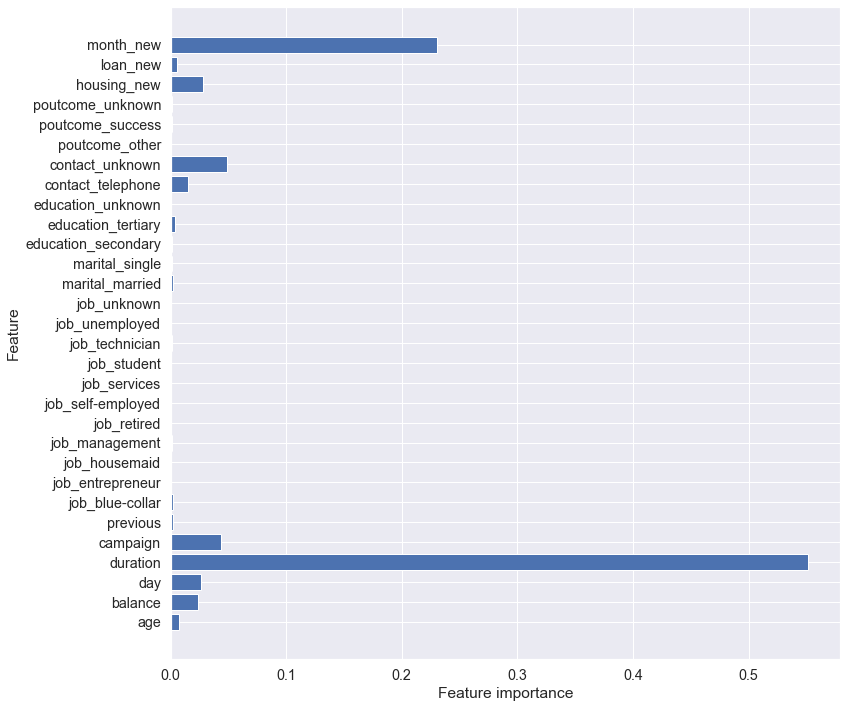

In [129]:
#Visualizing Feature Importance
def plot_feature_importances(model):
    n_features = xtrain_SMOTE.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), xtrain_SMOTE.columns.values) #trn.columns has list of all columns in our training data
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rf2) 

# XGBClassifier

In [130]:
!pip install xgboost

In [131]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=xtrain_SMOTE, y=ytrain_SMOTE, cv=5)
print(model_score)
print(model_score.mean())

[0.97402838 0.9679065  0.96744272 0.96753548 0.96493832]
0.9683702810499953


In [285]:
hyperparam_grid = {
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
}

xb2 = RandomizedSearchCV(XGBClassifier(),
                         hyperparam_grid,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search2 = xb2.fit(xtrain_SMOTE,ytrain_SMOTE)

search2.best_params_

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}

In [132]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=200)


In [133]:
model_xgb.fit(xtrain_SMOTE,ytrain_SMOTE) 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [134]:
model_xgb.score(xtest_SMOTE,ytest_SMOTE)

0.9674259850115011

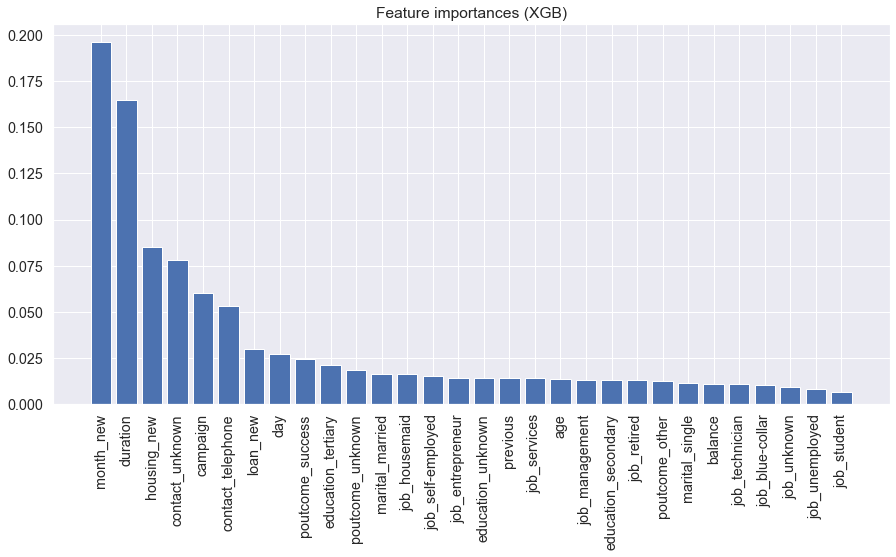

In [135]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(xtrain_SMOTE.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [136]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest_SMOTE,model_xgb.predict(xtest_SMOTE))
cm

array([[6498,  239],
       [ 200, 6540]], dtype=int64)

In [137]:
f1_score(ytest_SMOTE, model_xgb.predict(xtest_SMOTE))

0.9675271839633108

Good F1 score of 97%

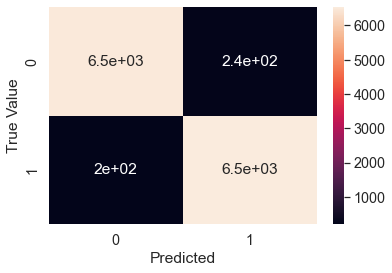

In [138]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

# TEST DATA

In [159]:
test_data = pd.read_csv("./Test_Data.csv")

In [160]:
test_data.shape

(9043, 17)

In [161]:
test_data.drop(['default'],axis = 1,inplace = True)

In [162]:
test_data.drop(['pdays'],axis = 1,inplace = True)

In [163]:
#Capping - Outliers treatment

tenth_percentile = np.percentile(test_data['age'],0 )
ninetieth_percentile = np.percentile(test_data['age'], 99)
# print(tenth_percentile, ninetieth_percentile)
b = np.where(test_data['age']<tenth_percentile, tenth_percentile, test_data['age'])
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:", b)

New array: [35. 40. 40. ... 72. 57. 37.]


In [164]:
test_data['age'] = b

In [165]:
test_data['age'].min()

18.0

In [166]:
test_data['age'].max()

80.0

In [167]:
test_data['age']

0       35.0
1       40.0
2       40.0
3       49.0
4       33.0
        ... 
9038    51.0
9039    71.0
9040    72.0
9041    57.0
9042    37.0
Name: age, Length: 9043, dtype: float64

In [168]:
test_data4 = test_data.copy()

In [169]:
test_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9043 entries, 0 to 9042
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9043 non-null   float64
 1   job        9043 non-null   object 
 2   marital    9043 non-null   object 
 3   education  9043 non-null   object 
 4   balance    9043 non-null   int64  
 5   housing    9043 non-null   object 
 6   loan       9043 non-null   object 
 7   contact    9043 non-null   object 
 8   day        9043 non-null   int64  
 9   month      9043 non-null   object 
 10  duration   9043 non-null   int64  
 11  campaign   9043 non-null   int64  
 12  previous   9043 non-null   int64  
 13  poutcome   9043 non-null   object 
 14  y          0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 1.0+ MB


In [170]:
test_data4.shape

(9043, 15)

In [171]:
cat_column = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in  cat_column:
    test_data4 = pd.concat([test_data4.drop(col, axis=1),pd.get_dummies(test_data4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [172]:
bool_columns = ['housing', 'loan']
for col in  bool_columns:
    test_data4[col+'_new']=test_data4[col].apply(lambda x : 1 if x == 'yes' else 0)
    test_data4.drop(col, axis=1, inplace=True)

In [173]:
temp_dict = {'jan': 1, 'feb': 2, 'mar': 3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
# mapping values in column from dictionary
test_data4['month_new'] = test_data4.month.map(temp_dict)
test_data4 = test_data4.drop(['month'], axis=1)


In [174]:
test_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9043 entries, 0 to 9042
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9043 non-null   float64
 1   balance              9043 non-null   int64  
 2   day                  9043 non-null   int64  
 3   duration             9043 non-null   int64  
 4   campaign             9043 non-null   int64  
 5   previous             9043 non-null   int64  
 6   y                    0 non-null      float64
 7   job_blue-collar      9043 non-null   uint8  
 8   job_entrepreneur     9043 non-null   uint8  
 9   job_housemaid        9043 non-null   uint8  
 10  job_management       9043 non-null   uint8  
 11  job_retired          9043 non-null   uint8  
 12  job_self-employed    9043 non-null   uint8  
 13  job_services         9043 non-null   uint8  
 14  job_student          9043 non-null   uint8  
 15  job_technician       9043 non-null   u

In [175]:
x = test_data4.drop(['y'],axis=1)
y = test_data4['y']

In [176]:
x.shape,y.shape

((9043, 30), (9043,))

In [177]:
from sklearn.preprocessing import StandardScaler
#scaling
scl = StandardScaler() 
scl.fit(x)

StandardScaler()

In [178]:
x_scl_test = pd.DataFrame(scl.transform(x))
#xtest_scl = pd.DataFrame(scl.fit_transform(xtest))
x_scl_test.columns = x.columns 

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Multicolinarity check using VIF

vif = pd.DataFrame()
X =  pd.DataFrame(x_scl_test)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
20   education_tertiary  3.67
18       marital_single  3.60
17      marital_married  2.97
19  education_secondary  2.88
9        job_management  2.74
0                   age  2.72
10          job_retired  2.55
6       job_blue-collar  2.16
26     poutcome_unknown  1.94
14       job_technician  1.79
13          job_student  1.59
12         job_services  1.49
5              previous  1.48
25     poutcome_success  1.42
21    education_unknown  1.42
27          housing_new  1.41
24       poutcome_other  1.30
11    job_self-employed  1.26
8         job_housemaid  1.22
15       job_unemployed  1.21
7      job_entrepreneur  1.16
22    contact_telephone  1.14
29            month_new  1.11
16          job_unknown  1.10
4              campaign  1.10
23      contact_unknown  1.07
28             loan_new  1.06
1               balance  1.05
3              duration  1.04
2                   day  1.02

In [180]:
#XGBOOST


In [181]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=200)

In [182]:
model_xgb.fit(xtrain_SMOTE,ytrain_SMOTE) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [183]:
y_predict_test = model_xgb.predict(x_scl_test)

In [184]:
print(y_predict_test)

[1 1 1 ... 1 1 1]


In [187]:
y_target =  pd.DataFrame(y_predict_test, columns =['Term_deposit'])

In [188]:
y_target.shape

(9043, 1)

In [189]:
y_target

Term_deposit
0                1
1                1
2                1
3                1
4                1
...            ...
9038             1
9039             1
9040             1
9041             1
9042             1

[9043 rows x 1 columns]

In [193]:
y_target.to_csv('XGBOOST_Term_deposit_testdata.csv', sep='\t', encoding='utf-8',index=False)
    

In [192]:
#Random forest

In [194]:
rf_test = RandomForestClassifier(random_state = 1, **optimal_params)
_ = rf_test.fit(xtrain_SMOTE,ytrain_SMOTE)

#predictions on test data
preds_test_RFC_HP= rf_test.predict(x_scl_test)


In [195]:
y_target_rf =  pd.DataFrame(preds_test_RFC_HP, columns =['Term_deposit'])

In [196]:
y_target_rf.shape

(9043, 1)

In [197]:
y_target_rf.to_csv('Randomforext_Term_deposit_testdata.csv', sep='\t', encoding='utf-8',index=False)

In [199]:
#Logistic regression

In [200]:
lr_test = LogisticRegression()
lr_test.fit(xtrain_SMOTE,ytrain_SMOTE)
pred_SMOTE_test = lr.predict(x_scl_test)

y_target_lr =  pd.DataFrame(pred_SMOTE_test, columns =['Term_deposit'])

In [201]:
y_target_lr.shape

(9043, 1)

In [202]:
y_target_lr.to_csv('Logisticregression_Term_deposit_testdata.csv', sep='\t', encoding='utf-8',index=False)

In [203]:
#Linear SVM

In [204]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier_test = SVC(kernel='linear', random_state=0)  
classifier_test.fit(xtrain_SMOTE, ytrain_SMOTE)  

#Predicting the test set result  
y_pred_SVM_test= classifier.predict(x_scl_test)  


In [205]:
y_target_svm =  pd.DataFrame(y_pred_SVM_test, columns =['Term_deposit'])

In [206]:
y_target_svm.shape

(9043, 1)

In [207]:
y_target_svm.to_csv('SVM_Term_deposit_testdata.csv', sep='\t', encoding='utf-8',index=False)